# Práctica 6 - Parte 2: Identificación del modelo logístico de conejos usando una RNN

---
## 📝 Enunciado general

En esta parte de la práctica vamos a trabajar con el modelo **logístico** para una población de conejos, pero en lugar de ajustar un modelo analítico (logístico en parámetros), utilizaremos una **red neuronal recurrente (RNN)** para aprender la dinámica directamente a partir de datos.

El notebook está organizado en tres ejercicios:

1. **Ejercicio 1:** Generar datos sintéticos a partir del modelo logístico físico.
2. **Ejercicio 2:** Entrenar una RNN para aprender la dinámica poblacional.
3. **Ejercicio 3:** Usar la RNN entrenada para simular/predicir la evolución del sistema.

## Importación de librerías comunes

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(41)  # Para reproducibilidad


---
## ✍️ Ejercicio 1: Generación de datos del modelo logístico

Modelar la evolución de la población de conejos mediante el modelo logístico discreto:

\begin{equation}
P(k+1) = \alpha P(k) - \beta P^2(k),
\end{equation}

que procede de la ecuación logística continua con parámetros ecológicos:

- Tasa de crecimiento: $r = 0.5$.
- Capacidad de carga: $K = 100$.

Se tiene que:
\begin{equation}
\alpha = 1 + r, \qquad \beta = \frac{r}{K}.
\end{equation}

Se pide:

- Calcular los valores de $\alpha$ y $\beta$ a partir de $r$ y $K$.
- Generar una serie temporal de longitud $N=200$ de la población verdadera $P(k)$, partiendo de una condición inicial $P(0)=10$.
- Añadir ruido de medida gaussiano con desviación típica $\sigma = 2$ para obtener las observaciones ruidosas:
   \begin{equation}
   y(k) = P(k) + v(k).
   \end{equation}
- Representar en un mismo gráfico la población verdadera $P(k)$ y las observaciones ruidosas $y(k)$.

**Pista:** trabaja con arrays de NumPy y un bucle for para iterar la ecuación recursiva.

## Solución propuesta:

alpha_true = 1.5000
beta_true  = 0.0050


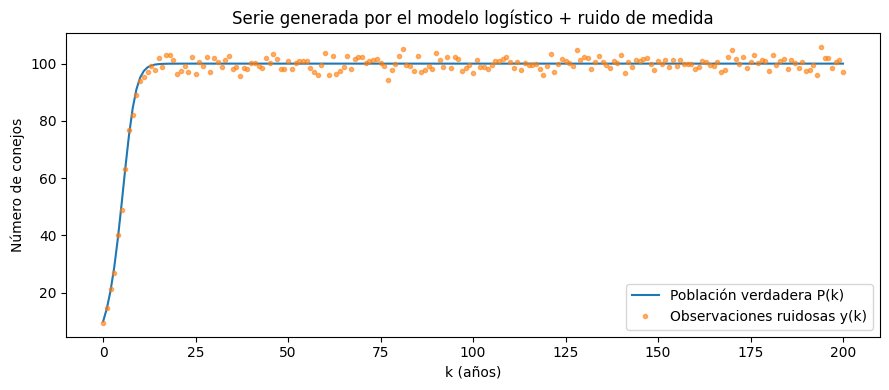

In [2]:
# Parámetros ecológicos verdaderos
r_true = 0.5
K_true = 100.0

# Cálculo de alpha y beta
alpha_true = 1.0 + r_true
beta_true = r_true / K_true
print(f"alpha_true = {alpha_true:.4f}")
print(f"beta_true  = {beta_true:.4f}")

# Generación de la serie P(k)
N = 200
P = np.zeros(N+1)
P[0] = 10.0
for k in range(N):
    P[k+1] = alpha_true * P[k] - beta_true * P[k]**2

# Añadimos ruido de medida
sigma_noise = 2.0
y = P + sigma_noise * np.random.randn(N+1)

# Gráfico comparativo
k_idx = np.arange(N+1)
plt.figure(figsize=(9,4))
plt.plot(k_idx, P, label='Población verdadera P(k)')
plt.plot(k_idx, y, '.', alpha=0.6, label='Observaciones ruidosas y(k)')
plt.xlabel('k (años)')
plt.ylabel('Número de conejos')
plt.title('Serie generada por el modelo logístico + ruido de medida')
plt.legend()
plt.tight_layout()
plt.show()

### Explicación del Ejercicio 1
Este bloque de código trata de realizar una simulación de un sitema biológico basado en el modelo logístico discreto presentado anteriormente para describir la evoluciónde una población de conejos $P(k)$.  

1. **Definición del modelo y parámetros:** en primer lugar se definen los valores a usar en el sistema (tasa de crecimiento y valor de carga), además de realizar los cálculos de  $\alpha$ y $\beta$. Estos coeficientes son esenciales, ya que nuestra RNN aprende la dinámica definida por estos coeficientes.  
  
2. **La simulación de la población:** definimos la longitud de la serie e incializamos la población $P$. Para la simulación empleamos un bucle donde en cada paso $k$ se calcule la población del año siguiente $P[k + 1]$ basándose en $P[k]$. En esta simulación se generará la trayectoria limpia de la población.  
  
3. **Adición de ruido:** dado que en el mundo real las mediciones nunca son perfectas, también tratamos de simular esto añadiendo un ruido a la población verdadera $P$. Para ello, se define una desviación típica y se generan una serie de observaciones a las que se le suman el ruido. Esta serie serán los datos que utilizaremos para el entrenamiento de la RNN en el siguiente ejercicio, ya que simulamos los datos obtenidos en un escenario real.  
  
4. **Visualización:** por último, se genera un gráfico que compare nuestra población verdader $P(k)$ (línea contínua) con las observaciones ruidosas $y(k)$ (los puntos dispersos). Además, se espera ver una curva que crece desde el 10 y se estabiliza para $K = 100$.

---
## ✍️ Ejercicio 2: Entrenamiento de una RNN para aprender la dinámica

Entrenar una **Red Neuronal Recurrente (RNN)** para que aprenda la ley de evolución de la población de conejos directamente a partir de datos.

En lugar de ajustar explícitamente los parámetros del modelo logístico, construiremos una RNN que, dado el valor de la población en un año, prediga el valor del año siguiente.

Queremos que la RNN implemente una aproximación de la forma:
\begin{equation}
\hat{P}(k+1) = F_\theta( P(k), h(k) ),
\end{equation}
donde $h(k)$ es el estado interno (oculto) de la red y $\theta$ son sus parámetros.

Tareas a realizar:

1. Dividir la serie ruidosa $y(k)$ en muestras de entrada y salida para entrenamiento:
   - Entrada: $y(k)$.
   - Objetivo: $y(k+1)$.
   Para $k = 0,\dots,N-1$.
2. Implementar una RNN sencilla usando una librería de deep learning (por ejemplo, **PyTorch**), con:
   - una capa recurrente (por ejemplo, `nn.RNN` o `nn.LSTM` con 1 capa),
   - una capa lineal final para producir la predicción $\hat{P}(k+1)$.
3. Entrenar la red minimizando el error cuadrático medio (MSE) entre $y(k+1)$ y $\hat{y}(k+1)$.
4. Representar la evolución del error de entrenamiento por épocas.

## Solución propuesta:

A continuación se muestra una posible implementación usando **PyTorch**. Puedes adaptar los hiperparámetros (número de neuronas, épocas, tasa de aprendizaje).

Época 20/2500, Loss = 9436.9834
Época 40/2500, Loss = 9132.9297
Época 60/2500, Loss = 8816.9473
Época 80/2500, Loss = 8490.9912
Época 100/2500, Loss = 8172.8433
Época 120/2500, Loss = 7864.1626
Época 140/2500, Loss = 7564.8237
Época 160/2500, Loss = 7274.5542
Época 180/2500, Loss = 6993.1064
Época 200/2500, Loss = 6720.2524
Época 220/2500, Loss = 6455.7905
Época 240/2500, Loss = 6199.5229
Época 260/2500, Loss = 5951.2676
Época 280/2500, Loss = 5710.8398
Época 300/2500, Loss = 5478.0249
Época 320/2500, Loss = 5252.3564
Época 340/2500, Loss = 5033.9287
Época 360/2500, Loss = 4822.6426
Época 380/2500, Loss = 4618.2930
Época 400/2500, Loss = 4420.7144
Época 420/2500, Loss = 4229.7441
Época 440/2500, Loss = 4045.2285
Época 460/2500, Loss = 3867.0137
Época 480/2500, Loss = 3694.9546
Época 500/2500, Loss = 3528.9087
Época 520/2500, Loss = 3368.7351
Época 540/2500, Loss = 3214.2932
Época 560/2500, Loss = 3065.4438
Época 580/2500, Loss = 2922.0469
Época 600/2500, Loss = 2783.9658
Época 620/2500

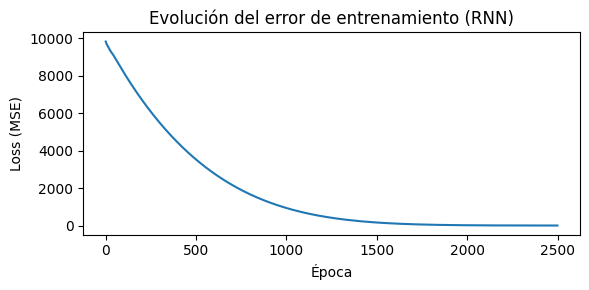

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim

# Preparamos datos de entrenamiento: (y(k) -> y(k+1))
y_input = y[:-1].reshape(-1, 1, 1)   # (N, batch=1, features=1)
y_target = y[1:].reshape(-1, 1, 1)   # (N, batch=1, features=1)

y_input_t = torch.tensor(y_input, dtype=torch.float32)
y_target_t = torch.tensor(y_target, dtype=torch.float32)

class SimpleRNN(nn.Module):
    def __init__(self, hidden_size=8):
        super(SimpleRNN, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size=1, hidden_size=hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x, h0=None):
        # x: (batch, seq_len, input_size)
        out, h = self.rnn(x, h0)
        # Tomamos la última salida de la secuencia (seq_len=1 aquí)
        y_pred = self.fc(out)
        return y_pred, h

# Instanciamos la red
hidden_size = 8
model = SimpleRNN(hidden_size=hidden_size)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

num_epochs = 2500
loss_history = []

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    # Pasamos la secuencia completa de una vez (cada paso: y(k)->y(k+1))
    y_pred, _ = model(y_input_t)
    loss = criterion(y_pred, y_target_t)
    loss.backward()
    optimizer.step()

    loss_history.append(loss.item())
    if (epoch+1) % 20 == 0:
        print(f"Época {epoch+1}/{num_epochs}, Loss = {loss.item():.4f}")

# Curva de pérdida
plt.figure(figsize=(6,3))
plt.plot(loss_history)
plt.xlabel('Época')
plt.ylabel('Loss (MSE)')
plt.title('Evolución del error de entrenamiento (RNN)')
plt.tight_layout()
plt.show()

### Explicación del Ejercicio 2

El objetivo de este bloque es **entrenar una Red Neuronal Recurrente (RNN)** para que aprenda la dinámica temporal del sistema a partir de las observaciones ruidosas $y(k)$, es decir, que sea capaz de aproximar la relación $y(k) \rightarrow y(k+1)$ sin estimar explícitamente $\alpha$ y $\beta$.  

1. **Preparación del conjunto de entrenamiento:** se construyen dos series alineadas en el tiempo: la entrada $y(k)$ y el objetivo $y(k+1)$. Para ello se toman los datos ruidosos y se desplazan una posición (con y[:-1] y y[1:]). Además, se reestructuran (reshape) para ajustarlos al formato que espera PyTorch, quedando tensores con forma (N, 1, 1). En esta implementación concreta, batch_first=True implica que la dimensión se interpreta como (batch, seq_len, features), y aquí se está usando una **secuencia de longitud 1** por muestra.  
  
2. **Definición del modelo (arquitectura):** se implementa una clase SimpleRNN con dos partes:  
   - Una capa recurrente nn.RNN que mantiene un **estado oculto** y extrae una representación interna a partir de la entrada.  
   - Una capa lineal nn.Linear que transforma la salida de la RNN en la predicción final escalar $\hat{y}(k+1)$.  
   En el método forward, la red devuelve tanto la predicción como el estado oculto, lo que permite (si se desea) reutilizar memoria temporal entre pasos.  
  
3. **Función de coste y optimización:** se define el criterio como **MSE** (nn.MSELoss), que penaliza el error cuadrático entre la predicción y el objetivo. Para ajustar los parámetros se utiliza el optimizador **Adam** con una tasa de aprendizaje lr=0.01, que suele converger bien en este tipo de problemas.  
  
4. **Bucle de entrenamiento y seguimiento del error:** durante num_epochs épocas se realiza el ciclo típico de entrenamiento: poner el modelo en modo entrenamiento, poner a cero gradientes, calcular y_pred, evaluar la pérdida, hacer backward() y actualizar parámetros con optimizer.step(). En cada época se guarda el valor de la pérdida en loss_history y se imprime periódicamente para monitorizar la convergencia. Finalmente, se representa la curva de pérdida para comprobar si el error disminuye y si el entrenamiento se estabiliza.  

---
## ✍️ Ejercicio 3: Simulación del sistema con la RNN entrenada

Una vez entrenada la RNN, utilizarla como **modelo dinámico** para simular/predicir la evolución futura de la población de conejos.

Se pide:
1. Elegir una condición inicial $P(0)$ (por ejemplo, el valor real $P(0)$ o alguno de los valores observados $y(k)$).
2. Usar la RNN para generar una trayectoria predicha $\hat{P}(k)$ durante $M$ pasos futuros, utilizando en cada paso la salida predicha del paso anterior como entrada para el siguiente (predicción libre o *open-loop*).
3. Comparar gráficamente:
   - La trayectoria verdadera $P(k)$ (sin ruido, generada por el modelo físico).
   - La trayectoria predicha por la RNN $\hat{P}(k)$.
4. Calcular un índice de error (por ejemplo, MSE) entre ambas trayectorias.

## Solución propuesta:

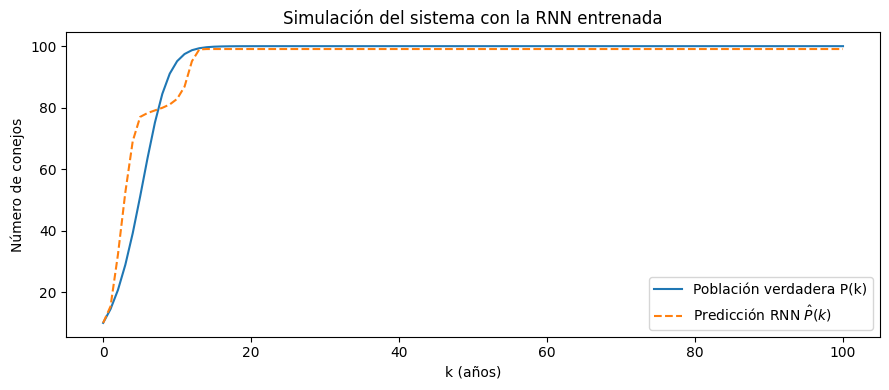

MSE entre la trayectoria verdadera y la RNN: 29.2867


In [10]:
# Simulación (predicción libre) usando la RNN entrenada
model.eval()

M = 100  # número de pasos de simulación
P_rnn = np.zeros(M+1)

# Condición inicial para la simulación de la RNN
P_rnn[0] = P[0]  # por ejemplo, la condición inicial verdadera

h = None
for k in range(M):
    # Entrada al modelo: y(k) ~ P_rnn(k)
    inp = torch.tensor([[ [P_rnn[k]] ]], dtype=torch.float32)  # shape (1,1,1)
    with torch.no_grad():
        y_pred, h = model(inp, h)
    # Salida escalar
    P_rnn[k+1] = y_pred.item()

# Trayectoria verdadera para comparar (del mismo tamaño)
P_true_sim = P[:M+1]

k_sim = np.arange(M+1)
plt.figure(figsize=(9,4))
plt.plot(k_sim, P_true_sim, label='Población verdadera P(k)')
plt.plot(k_sim, P_rnn, '--', label='Predicción RNN $\\hat{P}(k)$')
plt.xlabel('k (años)')
plt.ylabel('Número de conejos')
plt.title('Simulación del sistema con la RNN entrenada')
plt.legend()
plt.tight_layout()
plt.show()

# Cálculo de un índice de error (MSE)
mse_rnn = np.mean((P_true_sim - P_rnn)**2)
print(f"MSE entre la trayectoria verdadera y la RNN: {mse_rnn:.4f}")

### Explicación del Ejercicio 3

El objetivo de este bloque será la transfromación de la Red Neuronal Recurrente (RNN) en un modelo dinámico completo que genere una trayectoria con la predicción y que no dependa de más datos de entrenamiento utilizando salidas previas como entradas.  
  
1. **Configuración de la predicción:** poniendo la red en estado de evaluación, se definen valores como el número de pasos a ejecutar, vectores para un futuro almacenamiento de resultados y condiciones iniciales como el instante de comienzo o el estado de la RNN.  
  
2. **Simulación:** la simulación se basa en un bucle principal, donde dada una entrada para el modelo (el valor de población predicho en pasos anteriores) se toma la población actual, se predice la población para el año siguiente y se devuelve un nuevo estado que sirva para la siguiente iteración y qeu sirva como "recuerdo" de la información. Los valores de la predicción van almácenandose en el lugar correspondiente y usándose en pasos siguientes (realimentación).  
  
3. **Evaluación y visualización:** extrayendo la trayectoria verdadera $P(k)$ para el mismo rango, se genera una gráfica donde se comparan la población verdadera con la predicción realizada por la RNN. En el gráfico, se parecia la población verdadera como una línea continua y la predicción de la RNN como una línea discontinua, que superpuestas nos permiten realizar una evaluación sobre las predicciones de RNN (tanto el crecimiento como el punto de equilibrio). Además, se incluye el cálculo del MSE (Error Cuadrático Medio) entre la trayectoria real y la trayectoria de la predicción, sirviendo como métrica de rendimiento para el modelo entrenado.

---
## ✍️ Preguntas:
- Con la solución propuesta, la simulación no llega al mismo punto de equilibrio que en el caso real. ¿Por qué sucede esto? Retoca el código propuesto para mejorarlo y que se alcance el mismo equilibrio.
  
El fallo que provoca que la gráfica de la simulación no alcance el punto de equilibrio de la misma manera que el caso real, se debe principalmente a que existe una convergencia incompleta en el entrenamiento. En el caso de este apartado, la RNN se entrena para reducir el MSE para tratar de que la predicción se acerque a K = 100. Observando la gráfica de la evolución del error (Loss), se realiza un entrenamiento inicial para 400 épocas que tiene como resultado una gráfica donde en las últmas iteraciones aún se esta descendiendo lentamente, lo que nos indica que el proceso de optimización no está completo y que se ha detenido demasiado pronto, impidiendo de esta manera llegar al mínimo real. Esta situación sería la principal causante de que la simulación no alcance el punto de equilibrio correctamente.

La propuesta de mejora para este caso sería el aumento de las épocas en la simulación de entrenamiento hasta observar una cierta estabilización en la gráfica de evolución del error. Al aumentar estas épocas nos aseguramos de que la red tiene tiempo suficiente para ajustar sus parámetros y y que el punto de equilibrio coincida con el caso real.  

Para poder llevar a cabo esta mejora, simplemente debemos localizar en el código la sección destinada a las épocas (o epochs) y modificar su valor hasta apreciar el comportamiento esperado, que en este caso fue 2500 épocas. La línea de código específica sería la siguiente:
  > num_epochs = 2500

  
    
- Una vez que se ha logrado llegar al punto de equilibrio, ¿cómo se podría hacer que la simulación se pareciera más a los datos reales?  

Una vez se consigue que la RNN alcance el punto de equilibrio ajustando el entrenamiento, es posible observar igualmente que la trayectoria de la simulación no es exactamente igual a la trayectoria verdadera en todos los instentes antes de alcanzar el punto de equilibrio. Este hecho nos indica que no existe una suficiente capacidad de representación para calcular todas las relaciones complejas en cada paso.

Para poder mejorar el MSE final será necesario aumentar la capacidad de la RNN, utilizando más prámetros para el modelo de indentificación. Las mejoras que nos permiten aplicar esto serían dos: por un lado un mayor número de neuronas, que aumenta el número de prámetros libres en la red y permite almacenar y procesar la información con más detalle al añadir más unidades de procesamiento por capa. Por otro lado, con un aumento en el número de capas recurrentes (dado que trabajamos con una red neuronal recurrente compuesta por las mismas) podríamos construir una red más profunda, donde cada por cada capa donde pase la infromación extrajera características de distintos niveles comno dependencias, patrones, tendencias... Esta profundidad de la red nos permitiría aproximar el comportamiento de la simulación al caso real de forma más efectiva.

Con estas dos mejoras podríamos aumentar de forma efectiva el número total de parámetros de la red,lo que supondría una ventaja dado que una mayor cantidad de parámetros resultaría en un modelo de identificación con la capacidad de aproximar el comportamiento del modelo real con un menor MSE y más precisión y fidelidad.


- Realizar una comparativa RNN vs LSTM.

En este apartado, se compara una RNN simple con una LSTM entrenadas para aproximar la relación $y(k) \rightarrow y(k+1)$. Normalmente, si el problema es “fácil” (como una dinámica logística suave) es habitual que **las curvas de pérdida bajen de forma parecida** en ambos modelos, porque los dos son capaces de ajustar bien la predicción a un paso y minimizar el MSE de entrenamiento.

Sin embargo, cuando pasamos a la simulación libre (*open-loop*), las dos redes pueden comportarse de forma distinta y, además, **no siempre se obtiene el mismo resultado al reentrenar**. Esto ocurre porque el entrenamiento depende de la inicialización aleatoria de pesos y del propio proceso de optimización: aunque el loss final sea parecido, se pueden obtener soluciones ligeramente diferentes que, al realimentar la predicción muchas veces, hacen que el error se acumule y la trayectoria se desvíe más o menos. En ese sentido, es normal que en algunas ejecuciones la LSTM “clave” mejor la dinámica y en otras no, incluso con un error de entrenamiento muy similar.

En particular, la LSTM a veces predice mejor porque dispone de un mecanismo de memoria (estado de celda y compuertas) que le ayuda a mantener una dinámica más estable cuando la salida se reutiliza como entrada. Pero esa misma capacidad también implica más parámetros y más sensibilidad a cómo se ha entrenado: si el entrenamiento solo está optimizado para el error a un paso, pequeñas diferencias en los pesos pueden traducirse en diferencias grandes en la simulación a largo plazo. Por eso, en una comparativa real, lo más representativo es fijarse tanto en la pérdida como en la simulación libre y repetir el entrenamiento varias veces o fijar semillas para que la comparación sea consistente.

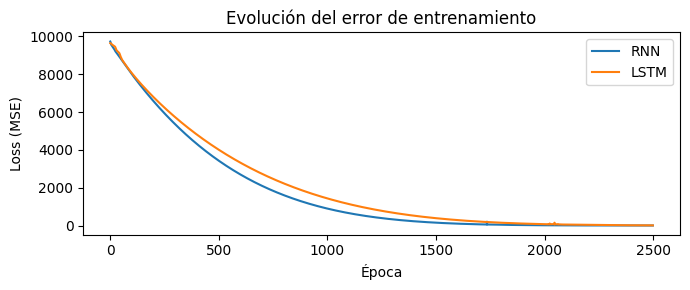

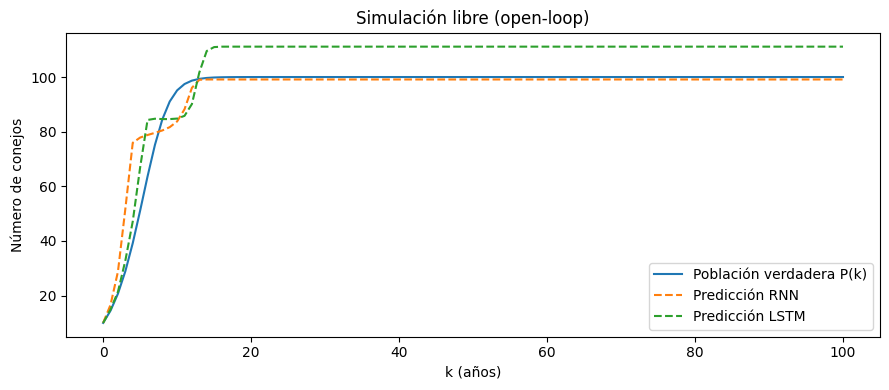


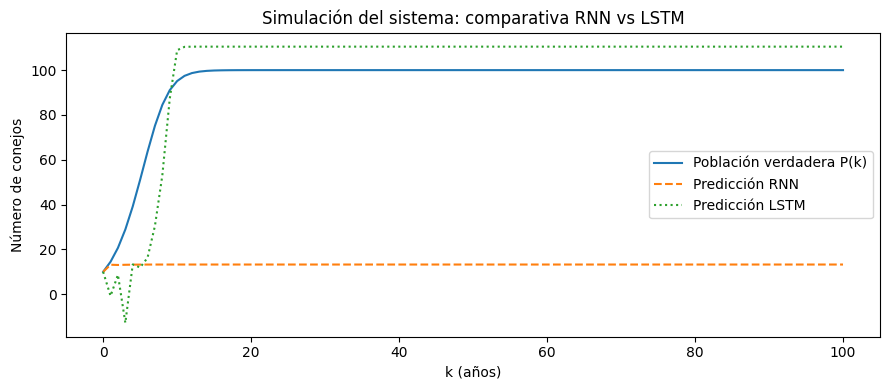
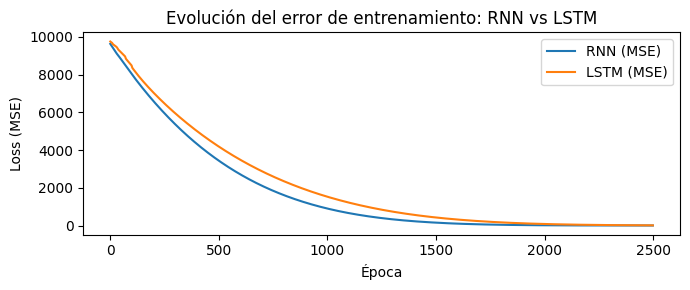


- Introducir más capas y neuronas a la red utilizando PyTorch (opcional, +1 punto).

Este apartado se basa en que, aunque el entrenamiento reduzca el error, la red puede no tener capacidad suficiente para representar con precisión toda la no linealidad de la dinámica, y en predicción libre esto se nota todavía más porque pequeñas diferencias se van acumulando. Para mejorar el ajuste y la estabilidad, se puede aumentar el número de neuronas del estado oculto y/o apilar varias capas recurrentes, lo que incrementa el número de parámetros y permite que el modelo aprenda relaciones más complejas.

La mejora más directa es aumentar el tamaño del estado oculto, por ejemplo pasando de 8 neuronas a 16 o 32. Esto suele reducir el error si la red estaba limitada por capacidad, aunque puede requerir más épocas de entrenamiento. A nivel de código, bastaría con modificar el valor de hidden_size, por ejemplo:
  > hidden_size = 16

Además, PyTorch permite añadir más capas recurrentes usando el parámetro num_layers, lo que construye una red más profunda y, en algunos casos, mejora la estabilidad de la simulación. El cambio estaría en la definición de la capa recurrente dentro del modelo, por ejemplo:
  > self.rnn = nn.RNN(input_size=1, hidden_size=16, num_layers=2, batch_first=True)

y en consecuencia ajustar la capa lineal final para que reciba 16 unidades:
  > self.fc = nn.Linear(16, 1)

Con estos cambios, lo recomendable es volver a revisar la evolución del error (Loss) y, si hace falta, aumentar también las épocas para que la red aproveche la mayor capacidad. La idea es que, con más neuronas y/o más capas, el modelo tenga margen para aproximar mejor la dinámica logística y producir trayectorias más fieles en simulación libre.  

> **Advertencia:** En alguna ocasión puede que os aparezca la $\hat{P}(k)$ negativa. Si esto ocurre, simplemente repetid el entrenamiento (esto ocurre por el rango de activación de las neuronas).

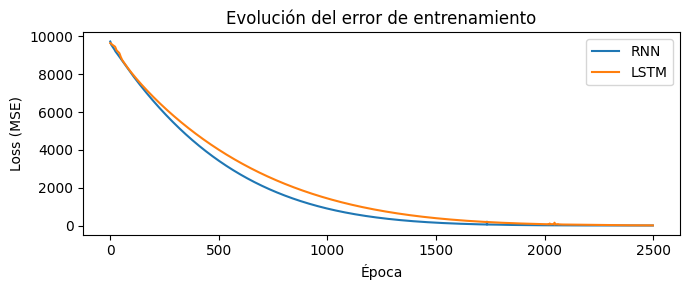

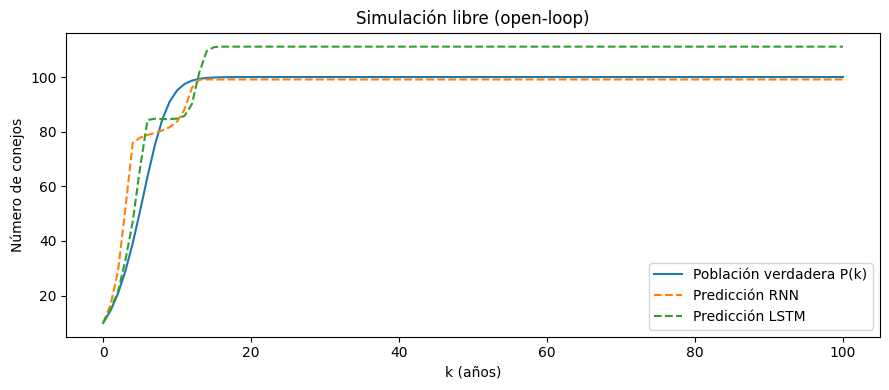

In [5]:
# Comparativa RNN vs LSTM

import torch
import torch.nn as nn
import torch.optim as optim

# Datos de entrenamiento (y(k) -> y(k+1))
y_input = y[:-1].reshape(-1, 1, 1)
y_target = y[1:].reshape(-1, 1, 1)
y_input_t = torch.tensor(y_input, dtype=torch.float32)
y_target_t = torch.tensor(y_target, dtype=torch.float32)

# Definimos modelos si no existen ya en el kernel
class SimpleRNN(nn.Module):
    def __init__(self, hidden_size=8):
        super(SimpleRNN, self).__init__()
        self.rnn = nn.RNN(input_size=1, hidden_size=hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x, h0=None):
        out, h = self.rnn(x, h0)
        y_pred = self.fc(out)
        return y_pred, h

class SimpleLSTM(nn.Module):
    def __init__(self, hidden_size=8):
        super(SimpleLSTM, self).__init__()
        self.lstm = nn.LSTM(input_size=1, hidden_size=hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x, state0=None):
        out, state = self.lstm(x, state0)
        y_pred = self.fc(out)
        return y_pred, state

hidden_size_cmp = 8
lr_cmp = 0.01
num_epochs_cmp = 2500

if 'model_rnn' not in globals():
    model_rnn = SimpleRNN(hidden_size=hidden_size_cmp)
if 'model_lstm' not in globals():
    model_lstm = SimpleLSTM(hidden_size=hidden_size_cmp)

# Entrenamiento SIN prints (guardando el loss)
criterion_rnn = nn.MSELoss()
criterion_lstm = nn.MSELoss()
optimizer_rnn = optim.Adam(model_rnn.parameters(), lr=lr_cmp)
optimizer_lstm = optim.Adam(model_lstm.parameters(), lr=lr_cmp)

loss_history_rnn = []
loss_history_lstm = []

for _epoch in range(num_epochs_cmp):
    # RNN
    model_rnn.train()
    optimizer_rnn.zero_grad()
    y_pred_rnn, _ = model_rnn(y_input_t)
    loss_rnn = criterion_rnn(y_pred_rnn, y_target_t)
    loss_rnn.backward()
    optimizer_rnn.step()
    loss_history_rnn.append(loss_rnn.item())

    # LSTM
    model_lstm.train()
    optimizer_lstm.zero_grad()
    y_pred_lstm, _ = model_lstm(y_input_t)
    loss_lstm = criterion_lstm(y_pred_lstm, y_target_t)
    loss_lstm.backward()
    optimizer_lstm.step()
    loss_history_lstm.append(loss_lstm.item())

# 1) Gráfica de loss (RNN vs LSTM)
_ = plt.figure(figsize=(7, 3))
plt.plot(loss_history_rnn, label='RNN')
plt.plot(loss_history_lstm, label='LSTM')
plt.xlabel('Época')
plt.ylabel('Loss (MSE)')
plt.title('Evolución del error de entrenamiento')
plt.legend()
plt.tight_layout()
plt.show()

# 2) Gráfica de simulación libre (open-loop)
M_vis = 100
k_vis = np.arange(M_vis + 1)
P_true_vis = P[:M_vis + 1]

model_rnn.eval()
model_lstm.eval()

P_rnn_vis = np.zeros(M_vis + 1)
P_lstm_vis = np.zeros(M_vis + 1)
P_rnn_vis[0] = P_true_vis[0]
P_lstm_vis[0] = P_true_vis[0]

h_rnn_vis = None
state_lstm_vis = None
for k in range(M_vis):
    inp_rnn_vis = torch.tensor([[[P_rnn_vis[k]]]], dtype=torch.float32)
    inp_lstm_vis = torch.tensor([[[P_lstm_vis[k]]]], dtype=torch.float32)
    with torch.no_grad():
        y_step_rnn_vis, h_rnn_vis = model_rnn(inp_rnn_vis, h_rnn_vis)
        y_step_lstm_vis, state_lstm_vis = model_lstm(inp_lstm_vis, state_lstm_vis)
    P_rnn_vis[k + 1] = y_step_rnn_vis.item()
    P_lstm_vis[k + 1] = y_step_lstm_vis.item()

plt.figure(figsize=(9, 4))
plt.plot(k_vis, P_true_vis, label='Población verdadera P(k)')
plt.plot(k_vis, P_rnn_vis, '--', label='Predicción RNN')
plt.plot(k_vis, P_lstm_vis, '--', label='Predicción LSTM')
plt.xlabel('k (años)')
plt.ylabel('Número de conejos')
plt.title('Simulación libre (open-loop)')
plt.legend()
plt.tight_layout()
plt.show()

[DeepRNN] Época 20/2500, Loss = 8718.1387
[DeepRNN] Época 40/2500, Loss = 8059.6064
[DeepRNN] Época 60/2500, Loss = 7448.4189
[DeepRNN] Época 80/2500, Loss = 6881.2139
[DeepRNN] Época 100/2500, Loss = 6352.6699
[DeepRNN] Época 120/2500, Loss = 5859.0454
[DeepRNN] Época 140/2500, Loss = 5397.7246
[DeepRNN] Época 160/2500, Loss = 4966.6797
[DeepRNN] Época 180/2500, Loss = 4564.2070
[DeepRNN] Época 200/2500, Loss = 4188.7964
[DeepRNN] Época 220/2500, Loss = 3839.0593
[DeepRNN] Época 240/2500, Loss = 3513.6899
[DeepRNN] Época 260/2500, Loss = 3211.4377
[DeepRNN] Época 280/2500, Loss = 2931.0320
[DeepRNN] Época 300/2500, Loss = 2662.1882
[DeepRNN] Época 320/2500, Loss = 2416.9380
[DeepRNN] Época 340/2500, Loss = 2191.3381
[DeepRNN] Época 360/2500, Loss = 1983.2245
[DeepRNN] Época 380/2500, Loss = 1791.5472
[DeepRNN] Época 400/2500, Loss = 1615.3225
[DeepRNN] Época 420/2500, Loss = 1453.6075
[DeepRNN] Época 440/2500, Loss = 1305.5046
[DeepRNN] Época 460/2500, Loss = 1170.1511
[DeepRNN] Época

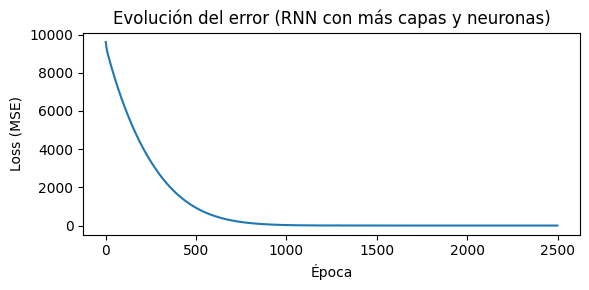

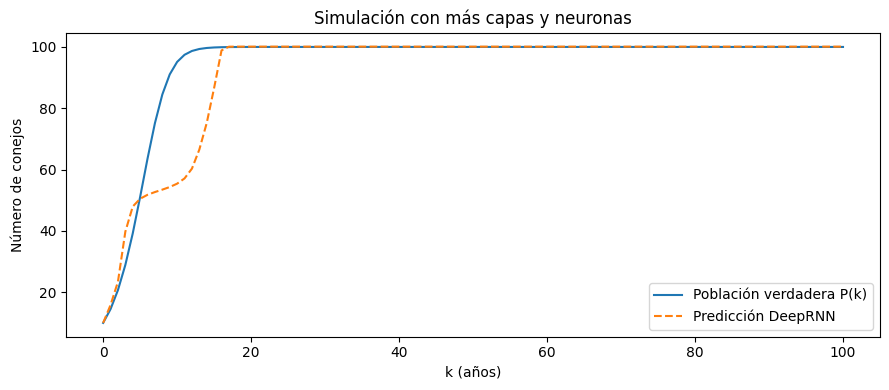

MSE open-loop DeepRNN: 95.9242


In [7]:
# RRN con más capas y neuronas

# Datos de entrenamiento (y(k) -> y(k+1))
y_input = y[:-1].reshape(-1, 1, 1)
y_target = y[1:].reshape(-1, 1, 1)
y_input_t = torch.tensor(y_input, dtype=torch.float32)
y_target_t = torch.tensor(y_target, dtype=torch.float32)

# Modelo con más neuronas y más capas
class DeepRNN(nn.Module):
    def __init__(self, hidden_size=16, num_layers=2):
        super(DeepRNN, self).__init__()
        self.rnn = nn.RNN(input_size=1, hidden_size=hidden_size, num_layers=num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x, h0=None):
        out, h = self.rnn(x, h0)
        y_pred = self.fc(out)
        return y_pred, h

deep_hidden_size = 16
deep_num_layers = 2
deep_model = DeepRNN(hidden_size=deep_hidden_size, num_layers=deep_num_layers)

criterion_deep = nn.MSELoss()
optimizer_deep = optim.Adam(deep_model.parameters(), lr=0.01)

deep_num_epochs = 2500
deep_loss_history = []

for epoch in range(deep_num_epochs):
    deep_model.train()
    optimizer_deep.zero_grad()
    y_pred_deep, _ = deep_model(y_input_t)
    loss_deep = criterion_deep(y_pred_deep, y_target_t)
    loss_deep.backward()
    optimizer_deep.step()
    deep_loss_history.append(loss_deep.item())
    if (epoch + 1) % 20 == 0:
        print(f"[DeepRNN] Época {epoch+1}/{deep_num_epochs}, Loss = {loss_deep.item():.4f}")

# Curva de pérdida del modelo más grande
plt.figure(figsize=(6,3))
plt.plot(deep_loss_history)
plt.xlabel('Época')
plt.ylabel('Loss (MSE)')
plt.title('Evolución del error (RNN con más capas y neuronas)')
plt.tight_layout()
plt.show()

# Simulación libre con el modelo más grande
deep_model.eval()
M_deep = 100
P_deep = np.zeros(M_deep + 1)
P_deep[0] = P[0]

h_deep = None
for k in range(M_deep):
    inp = torch.tensor([[[P_deep[k]]]], dtype=torch.float32)
    with torch.no_grad():
        y_pred_step, h_deep = deep_model(inp, h_deep)
    P_deep[k+1] = y_pred_step.item()

P_true_deep = P[:M_deep+1]
k_deep = np.arange(M_deep + 1)

plt.figure(figsize=(9,4))
plt.plot(k_deep, P_true_deep, label='Población verdadera P(k)')
plt.plot(k_deep, P_deep, '--', label='Predicción DeepRNN')
plt.xlabel('k (años)')
plt.ylabel('Número de conejos')
plt.title('Simulación con más capas y neuronas')
plt.legend()
plt.tight_layout()
plt.show()

mse_deep = np.mean((P_true_deep - P_deep)**2)
print(f"MSE open-loop DeepRNN: {mse_deep:.4f}")